In [1]:
from PIL import Image
import torchvision.transforms 
import matplotlib.pyplot as plt
from glob import glob

In [2]:
import random
import torch

In [3]:
def load_images(folder_path):
    image_paths = glob(f"{folder_path}/*.jpg")  # Adjust for your image format (e.g., *.png)
    images = []
    for path in image_paths:
        image = Image.open(path)
        images.append(image)
    return images

In [4]:
transform =torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ToTensor()
])

In [15]:
path='../images'
images=load_images(path)
image_tensor=[]
print(len(images))
for image in images:
    image_tensor.append(transform(image).unsqueeze(0))

10


In [16]:
image_tensor[1].shape

torch.Size([1, 3, 224, 224])

In [6]:
image_tensor

[tensor([[[0.2667, 0.2784, 0.2863,  ..., 0.0157, 0.0157, 0.0118],
          [0.2627, 0.2745, 0.2824,  ..., 0.0235, 0.0235, 0.0196],
          [0.2549, 0.2667, 0.2706,  ..., 0.0392, 0.0275, 0.0275],
          ...,
          [0.2353, 0.2314, 0.2353,  ..., 0.3373, 0.3294, 0.3216],
          [0.2353, 0.2392, 0.2392,  ..., 0.3451, 0.3373, 0.3255],
          [0.2314, 0.2392, 0.2392,  ..., 0.3373, 0.3333, 0.3294]],
 
         [[0.3255, 0.3373, 0.3451,  ..., 0.0275, 0.0157, 0.0118],
          [0.3216, 0.3333, 0.3412,  ..., 0.0235, 0.0157, 0.0157],
          [0.3137, 0.3255, 0.3294,  ..., 0.0314, 0.0157, 0.0157],
          ...,
          [0.2824, 0.2784, 0.2824,  ..., 0.3804, 0.3725, 0.3608],
          [0.2745, 0.2784, 0.2784,  ..., 0.3843, 0.3765, 0.3647],
          [0.2706, 0.2784, 0.2784,  ..., 0.3647, 0.3608, 0.3569]],
 
         [[0.3137, 0.3255, 0.3333,  ..., 0.0235, 0.0157, 0.0118],
          [0.3098, 0.3216, 0.3294,  ..., 0.0235, 0.0196, 0.0196],
          [0.3020, 0.3137, 0.3176,  ...,

In [ ]:
for image in images:
    plt.imshow(image)
    plt.title(path.split("/")[-1])  # Display filename as title (optional)
    plt.show()

In [8]:
patch_size=32
stride=patch_size

In [12]:
def extract_patches(image, patch_size, num_patches=40, stride=patch_size):

  batch_size, channels, image_height, image_width = image.size()

  # Calculate maximum number of possible patches along each dimension
  max_h_patches = (image_height - patch_size) // stride + 1
  max_w_patches = (image_width - patch_size) // stride + 1

  # Ensure enough patches are possible for the given image size
  if max_h_patches * max_w_patches < num_patches:
      raise ValueError(f"Image size is too small to extract {num_patches} non-overlapping patches of size {patch_size}.")

  # Randomly select patch starting indices within valid ranges
  patch_indices = []
  for _ in range(num_patches):
      h_start = random.randint(0, max_h_patches - 1) * stride
      w_start = random.randint(0, max_w_patches - 1) * stride
      patch_indices.append((h_start, w_start))

  # Extract patches based on selected indices
  patches = []
  for h_start, w_start in patch_indices:
      patch = image[:, :, h_start:h_start + patch_size, w_start:w_start + patch_size]
      patches.append(patch)

  patches = torch.stack(patches, dim=0)  # Stack patches into a single tensor

  return patches


In [20]:
patches=[]
for image in image_tensor:
    patches.append(extract_patches(image,patch_size))

In [21]:
patches[1].shape

torch.Size([40, 1, 3, 32, 32])

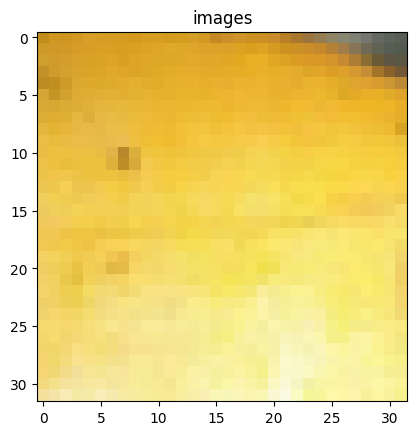

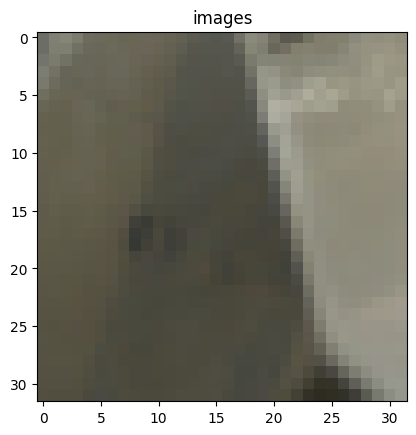

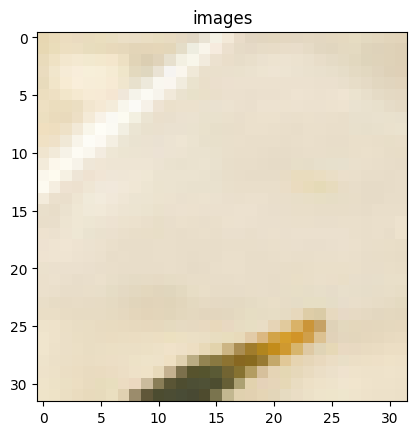

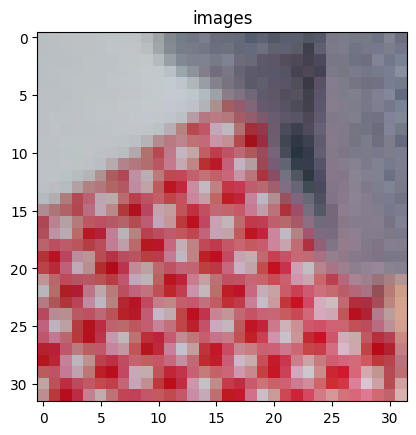

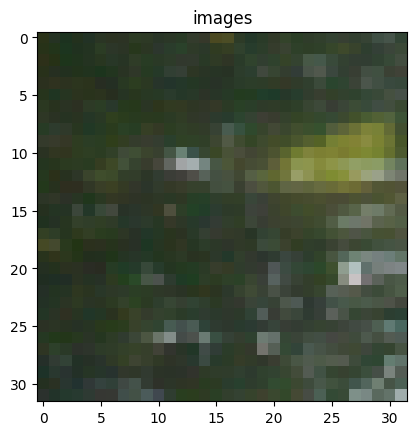

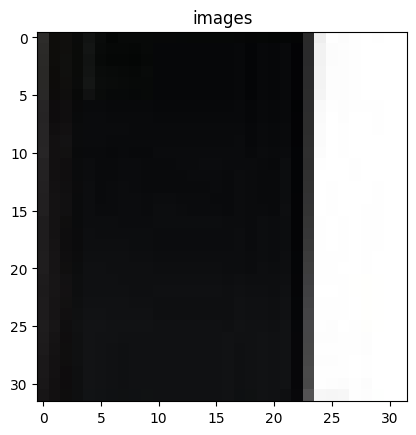

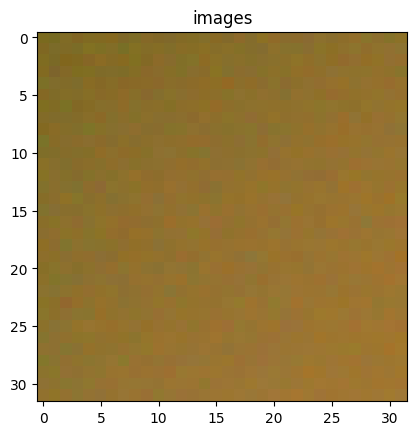

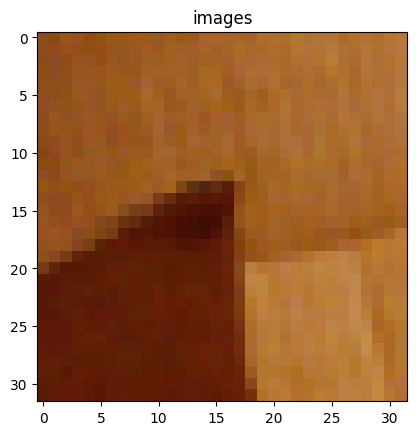

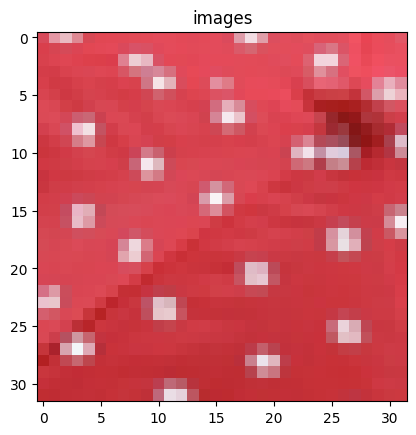

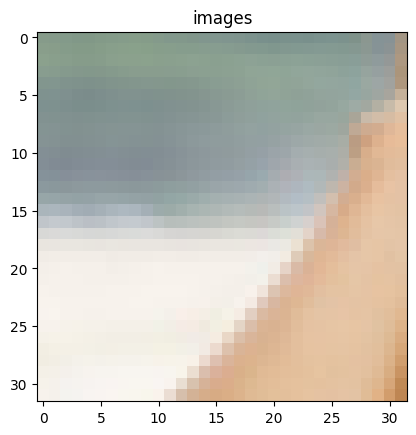

In [28]:
for patch in patches:
    patch=patch[0,0,:,:,:]
    plt.imshow(patch.permute(1,2,0))
    plt.title(path.split("/")[-1])  # Display filename as title (optional)
    plt.show()